In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from pandasgui import show
import  warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.cm as cm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, log_loss, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from IPython.display import display, HTML
import lime
import lime.lime_tabular
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### INDÍCES DE STRESS

In [58]:
# Passo 1: Carregar BASE ANTONIO
ANTONIO = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_ANTONIO.csv", sep=';')
# Passo 2: Carregar BASE MENINAS
MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')

# GRÁFICOS E VISUALIZAÇÕES:

In [30]:
def plotagem_geral(df, numericas, categoricas, filtrar_limiar=False, valores_limiar=None, y=str):
    # Filtrando o DataFrame, se necessário
    if filtrar_limiar and valores_limiar is not None:
        if isinstance(valores_limiar, list):
            df = df[df[y].isin(valores_limiar)]
        else:
            df = df[df[y] == valores_limiar]
    # Gráficos para variáveis numéricas
    rows_num = len(numericas)
    fig_num = make_subplots(rows=rows_num, cols=1, subplot_titles=numericas)
    for i, var in enumerate(numericas):
        fig_num.add_trace(go.Box(x=df[var], name=var), row=i + 1, col=1)
    fig_num.update_layout(
        height=200 * rows_num,  # Ajusta altura dinamicamente
        title="Visualização das Variáveis Numéricas" + (f" ({y} in {valores_limiar})" if filtrar_limiar else ""), showlegend=False)
    fig_num.show()
    # Gráficos para variáveis categóricas
    rows_cat = (len(categoricas) // 3) + 1  # Assumindo 3 colunas por linha
    fig_cat = make_subplots(rows=rows_cat, cols=3, subplot_titles=categoricas)
    for i, var in enumerate(categoricas):
        row, col = divmod(i, 3)
        row += 1  # Ajustando índice para a matriz
        value_counts = df[var].value_counts()
        fig_cat.add_trace(go.Bar(y=value_counts, x=value_counts.index.astype(str), name=var), row=row, col=col + 1)
    fig_cat.update_layout(
        height=300 * rows_cat,  # Ajusta altura dinamicamente
        title="Visualização das Variáveis Categóricas" + (f" ({y} in {valores_limiar})" if filtrar_limiar else ""), showlegend=False)
    fig_cat.show()

In [31]:
# Listas de variáveis
NUMERICAS = ['Classe', 'Média De Cianobactérias (céls/mL)', 'Insolação Total Diario (h)', 'Precipitação Total Diário (mm)', 'Temperatura Média Compensada  Diária (ºC)', 'Velocidade Média Diária Do Vento (m/s)', 'MédiaDeQ RevTaquac (m³/s)', 'MédiaDeQ RevCapiv (m³/s)', 'Média De Nível (m)', 'Média De Volume (hm³)', 'MédiaDeQ Jusante (m³/s)', 'SomaDeChuva (mm)', 'MédiaDeQ Natural (m³/s)', 'Antimonio (mg/L)', 'Arsenio (mg/L)', 'Bario Total (mg/L)', 'Cadmio Total (mg/L)', 'Chumbo Total (mg/L)', 'Cianeto livre (mg/L)', 'Cloreto (mg/L)', 'Cobre Total (mg/L)', 'Condutividade (µS/cm)', 'Cor Aparente (UC)', 'Cromo Total (mg/L)', 'DBO (mgO2/L)', 'DQO (mgO2/L)', 'Ferro Dissolvidoolvido  (mg/L)', 'Ferro Total (mg/L)', 'Fosforo Total (mg/L)', 'Manganes Dissolvido (mg/L)', 'Manganes Total (mg/L)', 'Mercurio Total (mg/L)', 'Niquel Total (mg/L)', 'Nitrogenio Albu (mg/L)', 'Nitrogenio Amoni (mg/L)', 'Nitrato (mg/L)', 'Nitrito (mg/L)', 'OD (mg/L)', 'pH', 'Prata Total (mg/L', 'Selenio Total (mg/L)', 'SDT (mg/L)', 'Solidos Total (mg/L)', 'Turbidez (UNT)', 'Zinco Total (mg/L)', 'Média De Escherichia coli (NMP/100 mL)', 'Média De Microcistinas (µg/L)']
CATEGORICAS = ['Classe']
plotagem_geral(df=ANTONIO, numericas=NUMERICAS, categoricas=CATEGORICAS, filtrar_limiar=True, y='Classe')

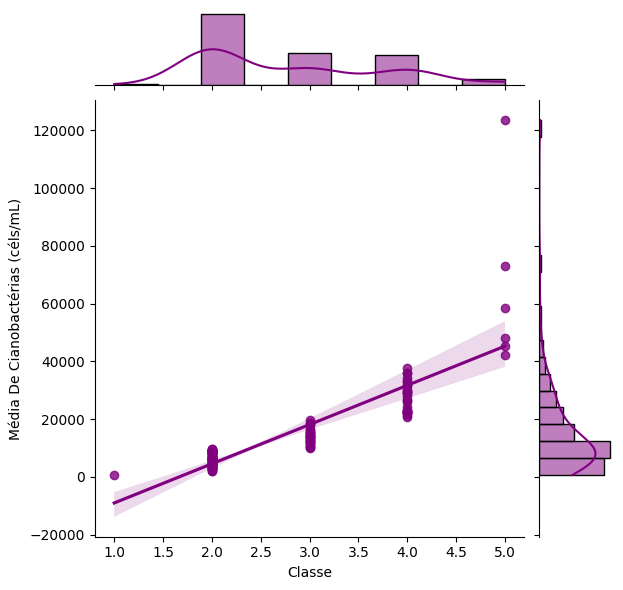

In [32]:
sns.jointplot(x='Classe',y='Média De Cianobactérias (céls/mL)',data=ANTONIO,color='purple', kind='reg')

# Distribuições de Valores:

### Técnica PCA para análise:

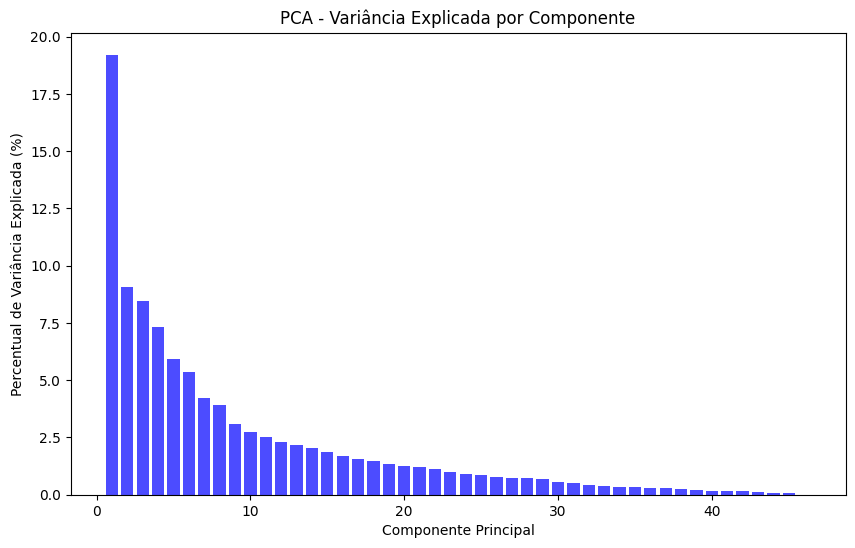

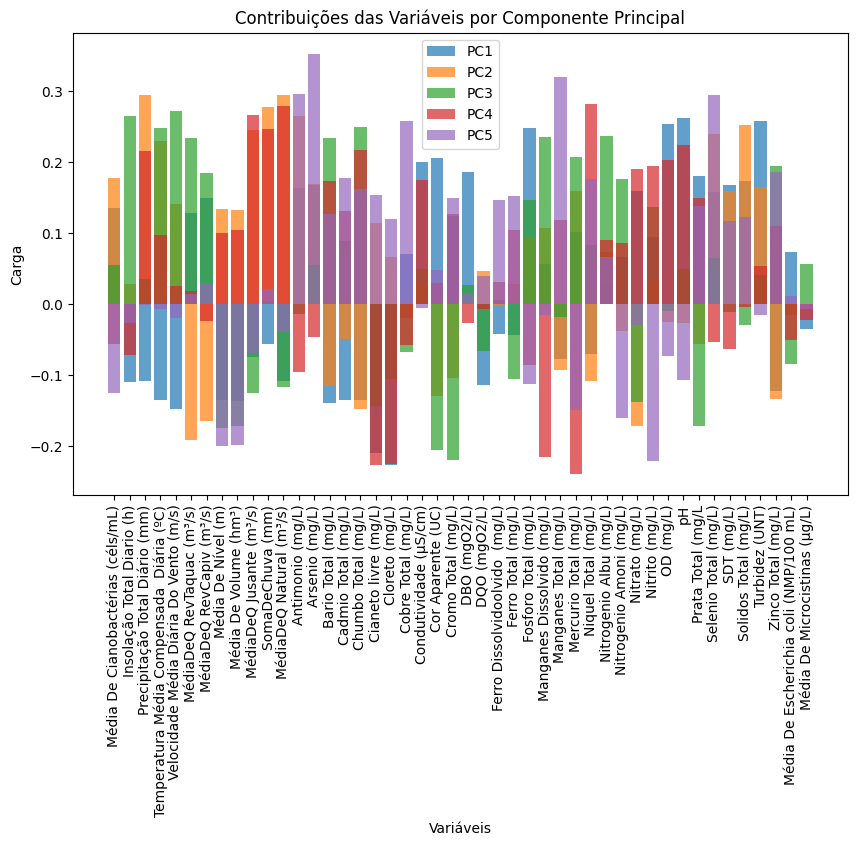

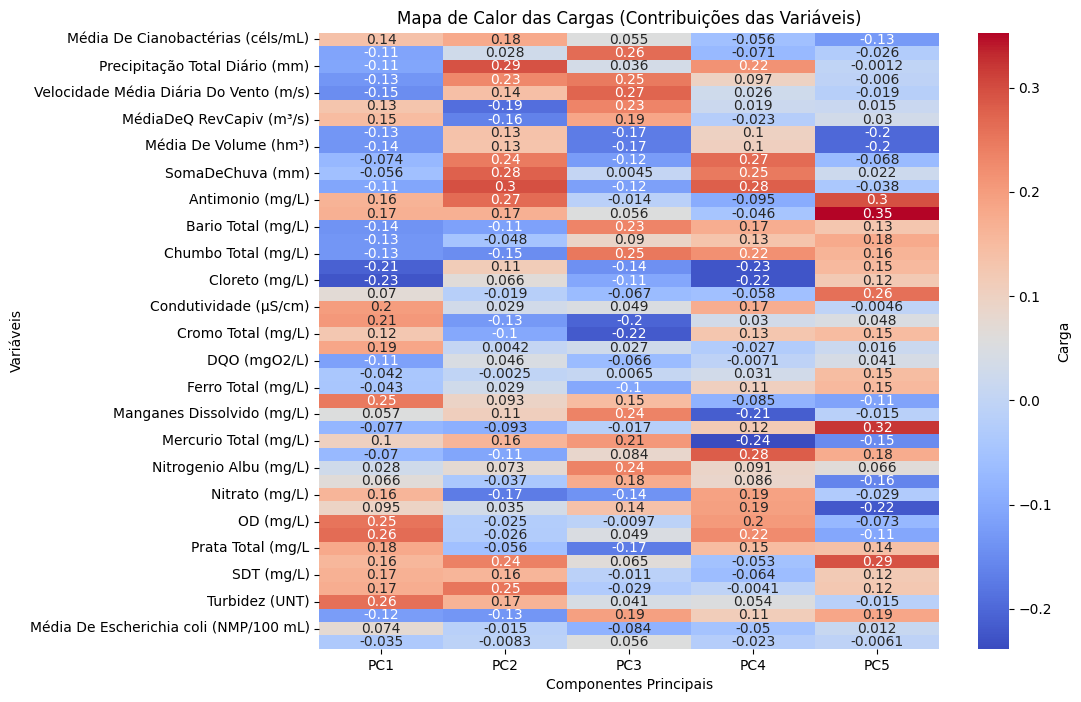

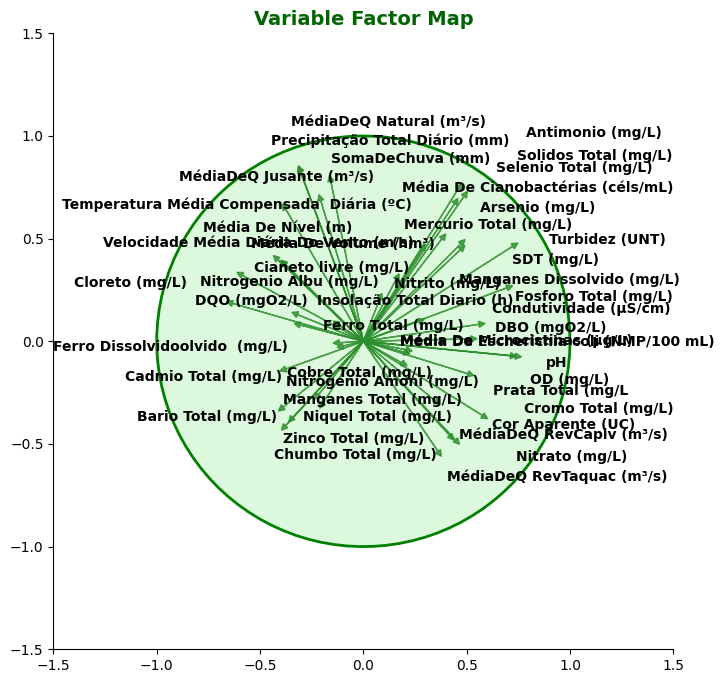

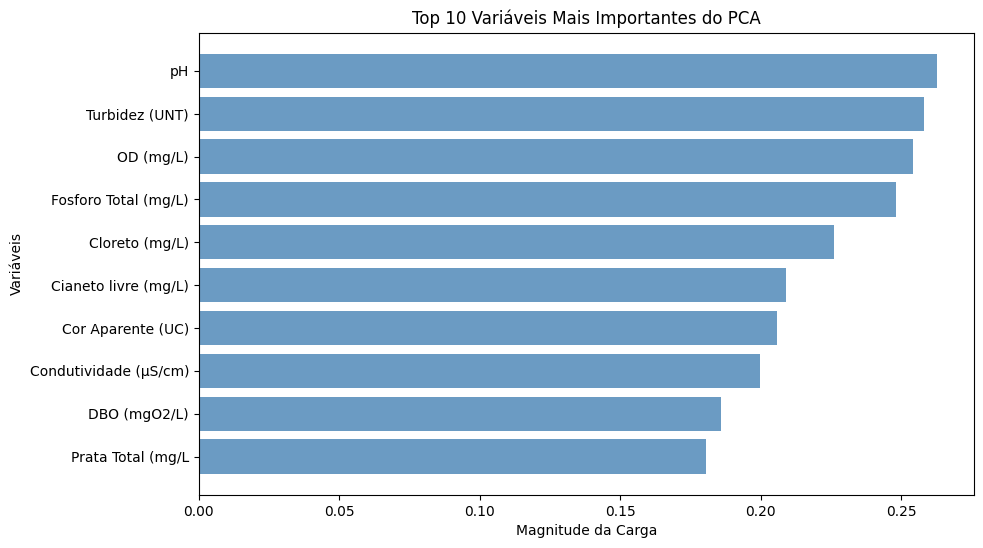

                   Variável  Carga Total
16      Chumbo Total (mg/L)     0.910146
30    Mercurio Total (mg/L)     0.855559
17     Cianeto livre (mg/L)     0.846218
11  MédiaDeQ Natural (m³/s)     0.837865
12         Antimonio (mg/L)     0.834410
39     Selenio Total (mg/L)     0.809407
13           Arsenio (mg/L)     0.792360
14       Bario Total (mg/L)     0.787776
9   MédiaDeQ Jusante (m³/s)     0.777978
43       Zinco Total (mg/L)     0.745974


In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import os

# Diretório para salvar as imagens
output_dir = r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_ANTONIO"
os.makedirs(output_dir, exist_ok=True)

# Selecionando as variáveis para PCA e Kernel PCA
variaveis_para_pca = ['Média De Cianobactérias (céls/mL)', 'Insolação Total Diario (h)', 'Precipitação Total Diário (mm)', 'Temperatura Média Compensada  Diária (ºC)', 'Velocidade Média Diária Do Vento (m/s)', 'MédiaDeQ RevTaquac (m³/s)', 'MédiaDeQ RevCapiv (m³/s)', 'Média De Nível (m)', 'Média De Volume (hm³)', 'MédiaDeQ Jusante (m³/s)', 'SomaDeChuva (mm)', 'MédiaDeQ Natural (m³/s)', 'Antimonio (mg/L)', 'Arsenio (mg/L)', 'Bario Total (mg/L)', 'Cadmio Total (mg/L)', 'Chumbo Total (mg/L)', 'Cianeto livre (mg/L)', 'Cloreto (mg/L)', 'Cobre Total (mg/L)', 'Condutividade (µS/cm)', 'Cor Aparente (UC)', 'Cromo Total (mg/L)', 'DBO (mgO2/L)', 'DQO (mgO2/L)', 'Ferro Dissolvidoolvido  (mg/L)', 'Ferro Total (mg/L)', 'Fosforo Total (mg/L)', 'Manganes Dissolvido (mg/L)', 'Manganes Total (mg/L)', 'Mercurio Total (mg/L)', 'Niquel Total (mg/L)', 'Nitrogenio Albu (mg/L)', 'Nitrogenio Amoni (mg/L)', 'Nitrato (mg/L)', 'Nitrito (mg/L)', 'OD (mg/L)', 'pH', 'Prata Total (mg/L', 'Selenio Total (mg/L)', 'SDT (mg/L)', 'Solidos Total (mg/L)', 'Turbidez (UNT)', 'Zinco Total (mg/L)', 'Média De Escherichia coli (NMP/100 mL)', 'Média De Microcistinas (µg/L)']
ANTONIO_PCA = ANTONIO[variaveis_para_pca]
# Normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(ANTONIO[variaveis_para_pca])

# Realizando o PCA
pca = PCA()
pca_resultados = pca.fit_transform(dados_normalizados)
variancia_explicada = pca.explained_variance_ratio_

# Organizando os resultados em DataFrames para visualização
pca_df = pd.DataFrame(pca_resultados, columns=[f"PC{i+1}" for i in range(pca_resultados.shape[1])])
variancia_df = pd.DataFrame({"Componente": [f"PC{i+1}" for i in range(len(variancia_explicada))], "Variancia_Explicada": variancia_explicada})

# Visualizando a Variância Explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada * 100, alpha=0.7, color='b')
plt.ylabel('Percentual de Variância Explicada (%)')
plt.xlabel('Componente Principal')
plt.title('PCA - Variância Explicada por Componente')
plt.savefig(os.path.join(output_dir, 'variancia_explicada_por_componente.png'))
plt.show()

# Cargas dos componentes (ou seja, contribuições de cada variável)
cargas = pca.components_.T

# Plotando as cargas
num_componentes = 5  # Altere para o número desejado de componentes a serem visualizados
plt.figure(figsize=(10, 6))
for i in range(num_componentes):
    plt.bar(variaveis_para_pca, cargas[:, i], alpha=0.7, label=f'PC{i+1}')
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Carga')
plt.title('Contribuições das Variáveis por Componente Principal')
plt.legend()
plt.savefig(os.path.join(output_dir, 'contribuicoes_por_componente.png'))
plt.show()

# Criando um DataFrame com as cargas para o heatmap
cargas_df = pd.DataFrame(cargas, index=variaveis_para_pca, columns=[f"PC{i+1}" for i in range(len(variancia_explicada))])

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cargas_df.iloc[:, :num_componentes], annot=True, cmap="coolwarm", cbar_kws={'label': 'Carga'})
plt.title('Mapa de Calor das Cargas (Contribuições das Variáveis)')
plt.xlabel('Componentes Principais')
plt.ylabel('Variáveis')
plt.savefig(os.path.join(output_dir, 'heatmap_cargas.png'))
plt.show()



# Função genérica para o gráfico de mapa de fatores de variáveis
def plot_variable_factor_map(df, pca, title='Variable Factor Map'):
    # Cria a figura e o eixo para o gráfico
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plota as setas para cada variável no componente principal
    for i in range(pca.components_.shape[1]):
        if i < len(df.columns):
            ax.arrow(0, 0,
                     pca.components_[0, i] * 2.8,
                     pca.components_[1, i] * 2.8,
                     head_width=0.03,
                     head_length=0.03,
                     color='darkgreen', linestyle='-', alpha=0.8)  # Setas em verde escuro

    # Adiciona o círculo unitário para escala com borda e preenchimento verde-claro
    an = np.linspace(0, 2 * np.pi, 100)
    ax.fill(np.cos(an), np.sin(an), color='lightgreen', alpha=0.3)  # Preenchimento verde-claro semi-transparente
    ax.plot(np.cos(an), np.sin(an), color='green', linewidth=2)  # Borda do círculo em verde

    # Personaliza o título e os limites do eixo
    ax.set_title(title, fontsize=14, fontweight='bold', color='darkgreen')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    # Adiciona os rótulos das variáveis com ajuste automático de texto e estilo em preto e negrito
    texts = [ax.text(pca.components_[0, i] * 3 + 0.01,
                     pca.components_[1, i] * 3 + 0.01,
                     df.columns[i],
                     color='black', fontweight='bold', fontsize=10) for i in range(len(df.columns))]
    adjust_text(texts)

    # Salva e exibe o gráfico
    plt.savefig(os.path.join(output_dir, 'variable_factor_map.png'))
    plt.show()

# Chamada da função com o PCA treinado
plot_variable_factor_map(ANTONIO[variaveis_para_pca], pca, 'Variable Factor Map')
# Número total de componentes principais
num_componentes = len(variancia_explicada)

visualizar_todos = False

if visualizar_todos == True:
    # Loop para plotar biplots para cada par de componentes principais
    for i in range(num_componentes - 1):
        for j in range(i + 1, num_componentes):
            plt.figure(figsize=(10, 8))
            plt.scatter(pca_df[f"PC{i+1}"], pca_df[f"PC{j+1}"], alpha=0.5, label='Observações')
            
            # Adicionando os vetores das variáveis no gráfico com linha tracejada vermelha
            for k, var in enumerate(variaveis_para_pca):
                plt.arrow(0, 0, cargas[k, i] * 5, cargas[k, j] * 5,
                        color='r', alpha=0.75, linestyle='--')  # Linha tracejada vermelha
                plt.text(cargas[k, i] * 5, cargas[k, j] * 5, var,
                        color='black', fontweight='bold', ha='center', va='center')  # Texto em preto e negrito

            plt.xlabel(f'PC{i+1}')
            plt.ylabel(f'PC{j+1}')
            plt.title(f'Biplot PCA - Componentes PC{i+1} e PC{j+1}')
            plt.grid()
            plt.legend()
            
            # Salvando cada figura individualmente
            plt.savefig(os.path.join(output_dir, f'biplot_PC{i+1}_PC{j+1}.png'))
            plt.show()

# Função para plotar as 10 variáveis mais importantes
def plot_top_10_variables(pca, variaveis, output_dir):
    # Calcula a importância das variáveis com base nos valores absolutos das cargas
    importancia = np.abs(pca.components_[0])  # Usando o primeiro componente principal como referência
    top_10_indices = np.argsort(importancia)[-10:][::-1]  # Seleciona os 10 maiores valores em ordem decrescente

    # Filtra as variáveis mais importantes e suas cargas
    top_10_variaveis = [variaveis[i] for i in top_10_indices]
    top_10_cargas = importancia[top_10_indices]

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_variaveis, top_10_cargas, color='steelblue', alpha=0.8)
    plt.xlabel('Magnitude da Carga')
    plt.ylabel('Variáveis')
    plt.title('Top 10 Variáveis Mais Importantes do PCA')
    plt.gca().invert_yaxis()  # Inverte o eixo Y para exibir o maior valor no topo

    # Salva e exibe o gráfico
    plt.savefig(os.path.join(output_dir, 'top_10_variaveis_pca.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Chamando a função para gerar o gráfico
plot_top_10_variables(pca, variaveis_para_pca, output_dir)

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def top_10_pca_variables_and_filtered_data(data, components=1, refine=False):
    # Normalizando os dados
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    # Aplicando PCA
    pca = PCA()
    pca.fit(data_normalized)
    
    # Cargas (pesos das variáveis nos componentes principais)
    cargas = np.abs(pca.components_)

    if refine:
        # Soma dos valores absolutos das cargas nos primeiros 'components' componentes
        cargas_totais = np.sum(cargas[:components, :], axis=0)
    else:
        # Considera apenas o primeiro componente principal (PC1)
        cargas_totais = cargas[0, :]

    # Criar um DataFrame com as cargas totais e os nomes das variáveis
    variaveis = pd.DataFrame({'Variável': data.columns, 'Carga Total': cargas_totais})

    # Ordenar e selecionar as 10 variáveis mais influentes
    top_10_variaveis = variaveis.sort_values(by='Carga Total', ascending=False).head(10)

    # Filtrar o DataFrame original para incluir apenas as 10 variáveis mais importantes
    top_10_nomes = top_10_variaveis['Variável'].tolist()
    filtered_data = data[top_10_nomes]

    return top_10_variaveis, filtered_data

# Exemplo de uso
# Suponha que `dados` seja o DataFrame com os dados de entrada
top_10, ANTONIO_FINAL = top_10_pca_variables_and_filtered_data(ANTONIO_PCA, components=5, refine=True)
print(top_10)

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\1959190070.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



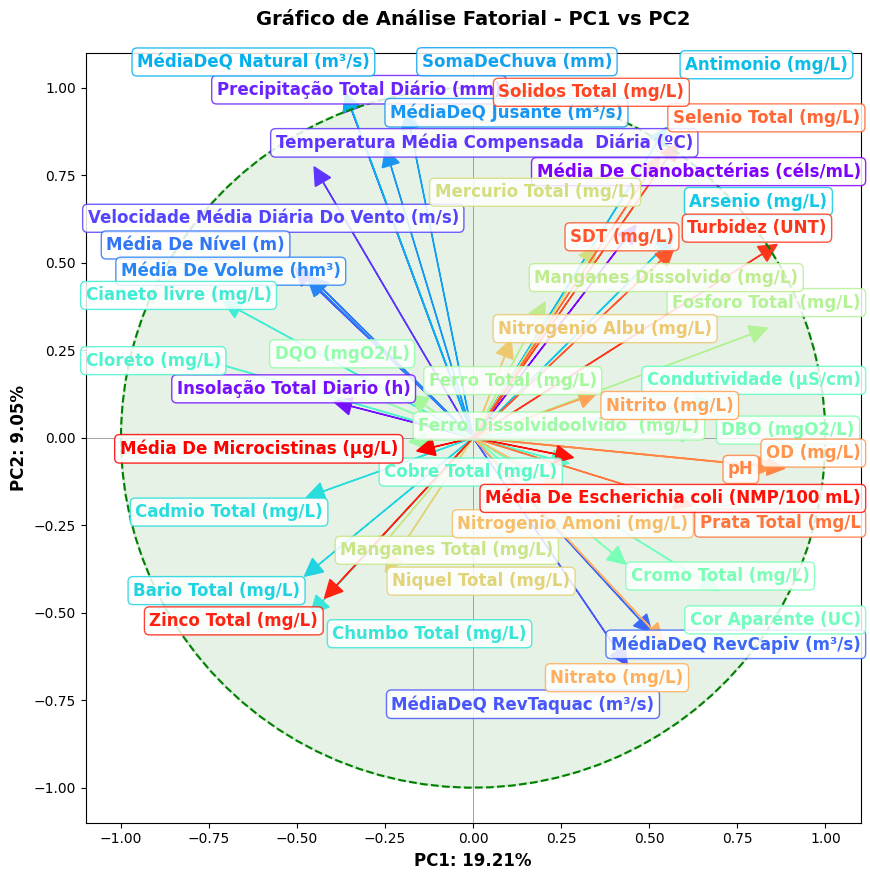

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\1959190070.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



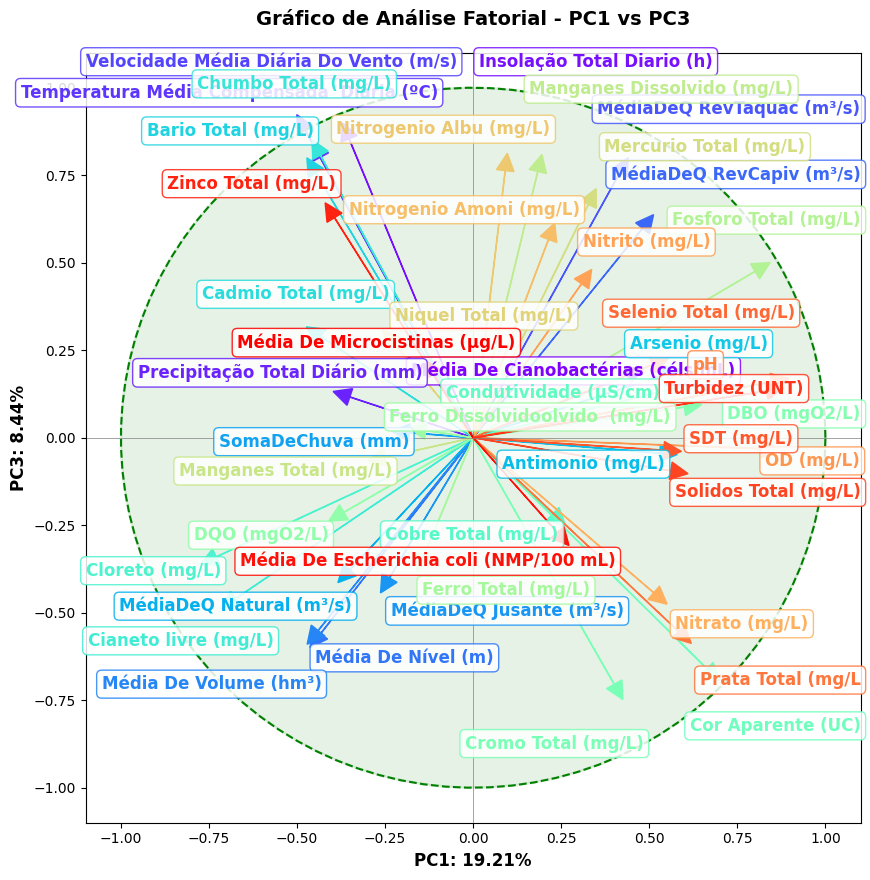

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\1959190070.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



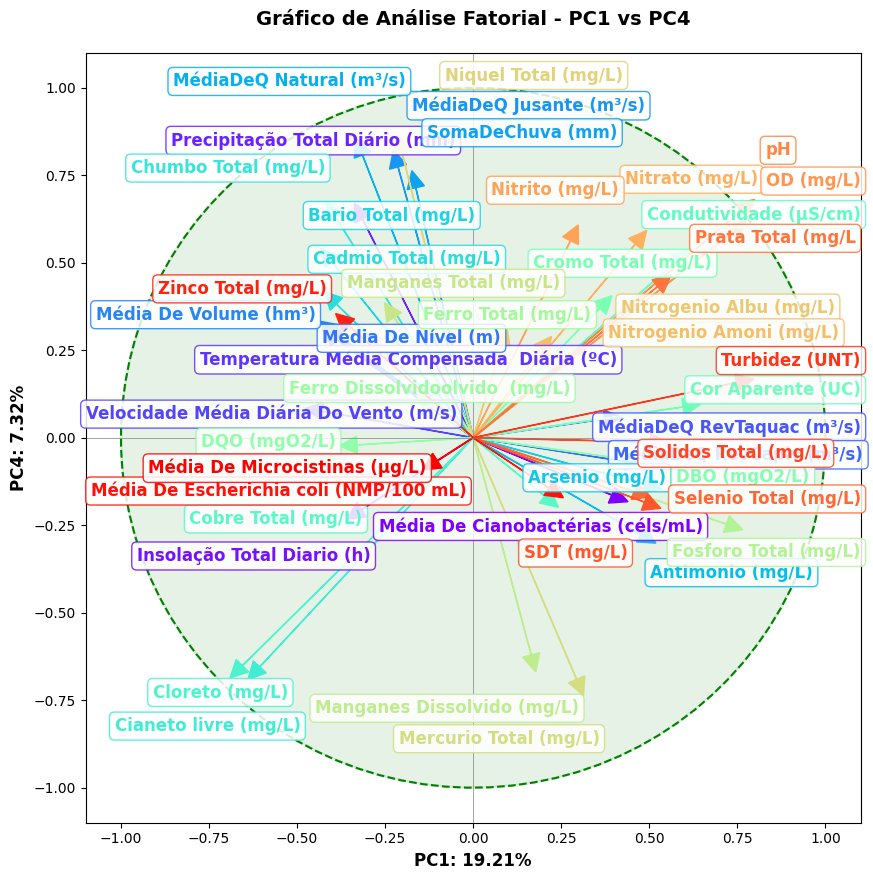

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\1959190070.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



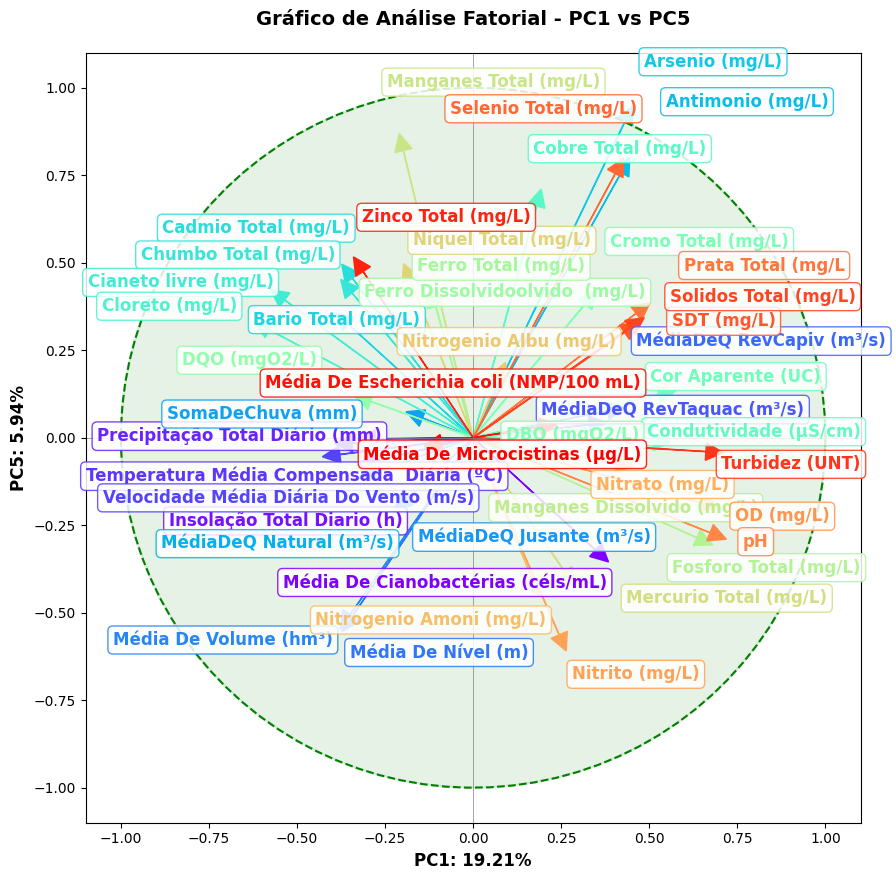

In [34]:
# Função genérica para o gráfico de mapa de fatores de variáveis para um par de componentes principais
def plot_variable_factor_map(df, pca, pc_x=0, pc_y=1, title='Gráfico de Análise Fatorial', text_size=12):
    # Cria a figura e o eixo para o gráfico
    fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
    # Plotando o círculo com borda verde e preenchimento verde claro transparente
    circle = plt.Circle((0, 0), 1, color='green', fill=True, alpha=0.1, linewidth=2, edgecolor='green')
    ax.add_patch(circle)
    
    # Calcula o comprimento máximo entre as setas (vetores) para normalização
    max_magnitude = max(np.sqrt(pca.components_[pc_x, i]**2 + pca.components_[pc_y, i]**2) for i in range(pca.components_.shape[1]))
    scale_factor = 1 / max_magnitude  # Define o fator de escala

    # Gera uma lista de cores única para cada variável
    colors = cm.rainbow(np.linspace(0, 1, len(df.columns)))

    # Ajusta o comprimento das setas e adiciona as cores únicas
    for i in range(pca.components_.shape[1]):
        if i < len(df.columns):
            vector_x = pca.components_[pc_x, i] * scale_factor
            vector_y = pca.components_[pc_y, i] * scale_factor
            ax.arrow(0, 0, vector_x, vector_y, head_width=0.05, head_length=0.05, color=colors[i], alpha=1, linewidth=1)  # Usa uma cor única para cada variável
    
    # Adiciona um círculo tracejado para destacar a unidade de escala
    an = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(an), np.sin(an), linestyle='--', color='green', linewidth=1.5)
    
    # Adiciona os rótulos das variáveis com cores correspondentes às setas
    texts = [ax.text((pca.components_[pc_x, i] * scale_factor) * 1.1, (pca.components_[pc_y, i] * scale_factor) * 1.2, df.columns[i], color=colors[i], fontweight='bold', ha='center', va='center', fontsize=text_size, bbox=dict(boxstyle="round,pad=0.3", edgecolor=colors[i], facecolor='white', alpha=0.85)) for i in range(len(df.columns))]
    adjust_text(texts)
    
    # Exibe a porcentagem de variância explicada nos eixos
    explained_variance = pca.explained_variance_ratio_ * 100
    ax.set_xlabel(f'PC{pc_x + 1}: {explained_variance[pc_x]:.2f}%', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC{pc_y + 1}: {explained_variance[pc_y]:.2f}%', fontsize=12, fontweight='bold')

    # Configurações gerais do gráfico
    ax.axhline(0, color='grey', linewidth=0.5)
    ax.axvline(0, color='grey', linewidth=0.5)
    ax.set_xlim([-1.1, 1.1])  # Limita o eixo X a [-1.1, 1.1]
    ax.set_ylim([-1.1, 1.1])  # Limita o eixo Y a [-1.1, 1.1]
    ax.set_title(f'{title} - PC{pc_x+1} vs PC{pc_y+1}', fontsize=14, fontweight='bold', color='black', pad=20)
    # Salva e exibe o gráfico
    plt.savefig(f'variable_factor_map_PC{pc_x+1}_PC{pc_y+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Gerar gráficos para os 5 primeiros componentes principais
for pc_x in range(1):
    for pc_y in range(pc_x + 1, 5):
        plot_variable_factor_map(ANTONIO[variaveis_para_pca], pca, pc_x=pc_x, pc_y=pc_y, title='Gráfico de Análise Fatorial', text_size=12)

# PCA para o df MENINAS:

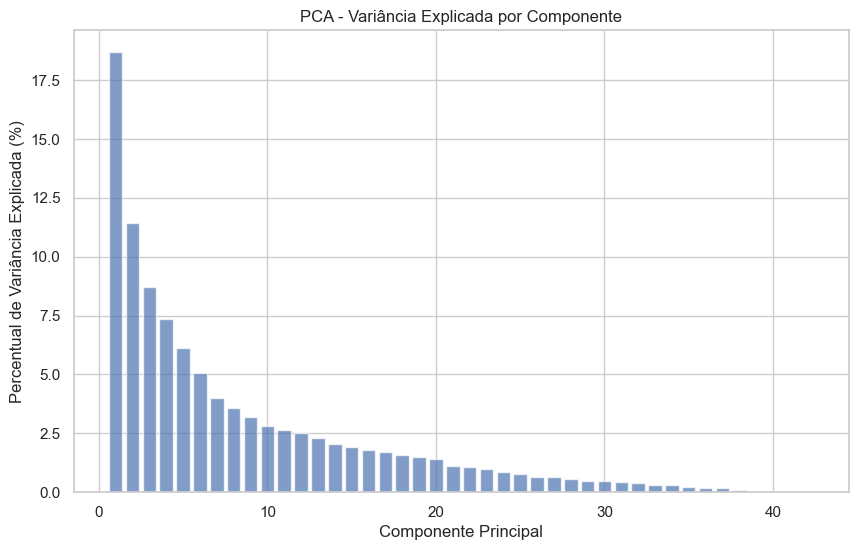

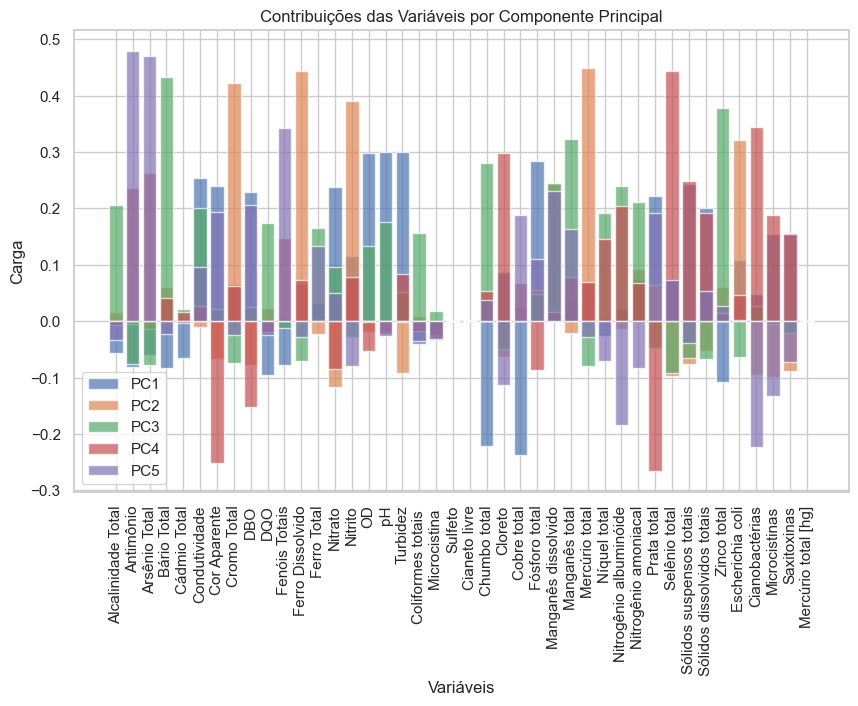

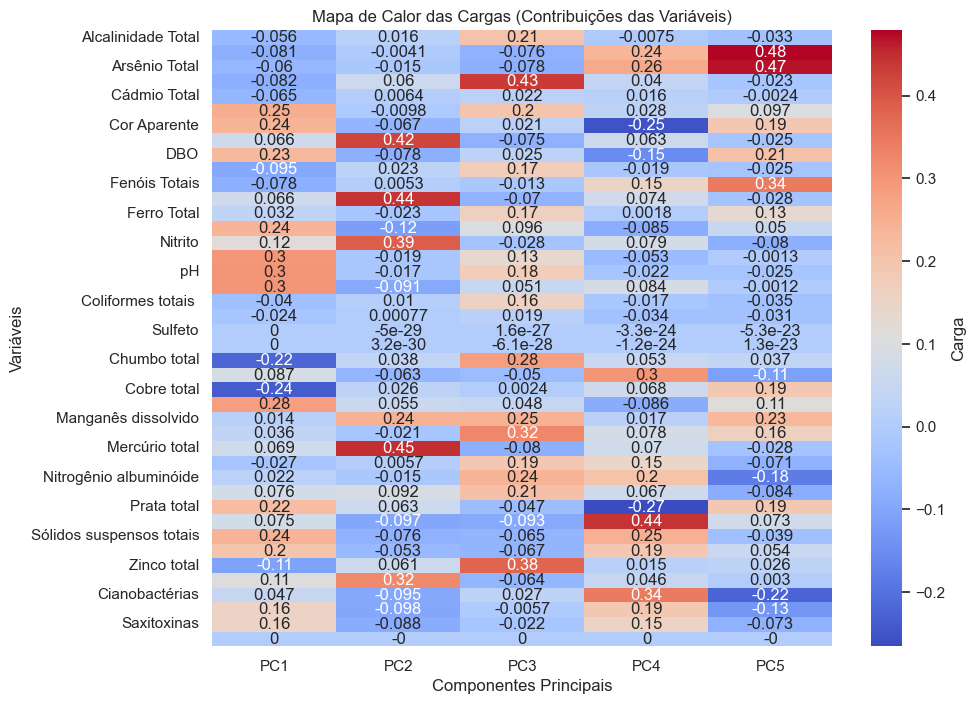

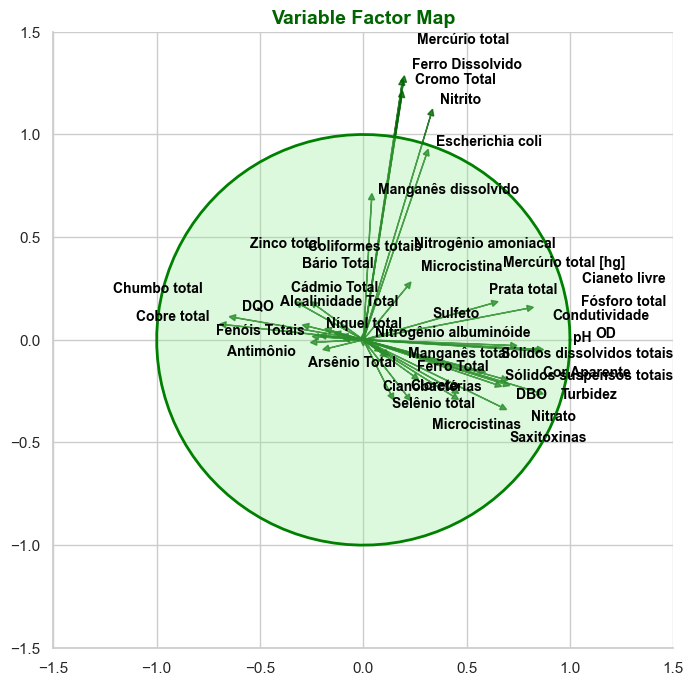

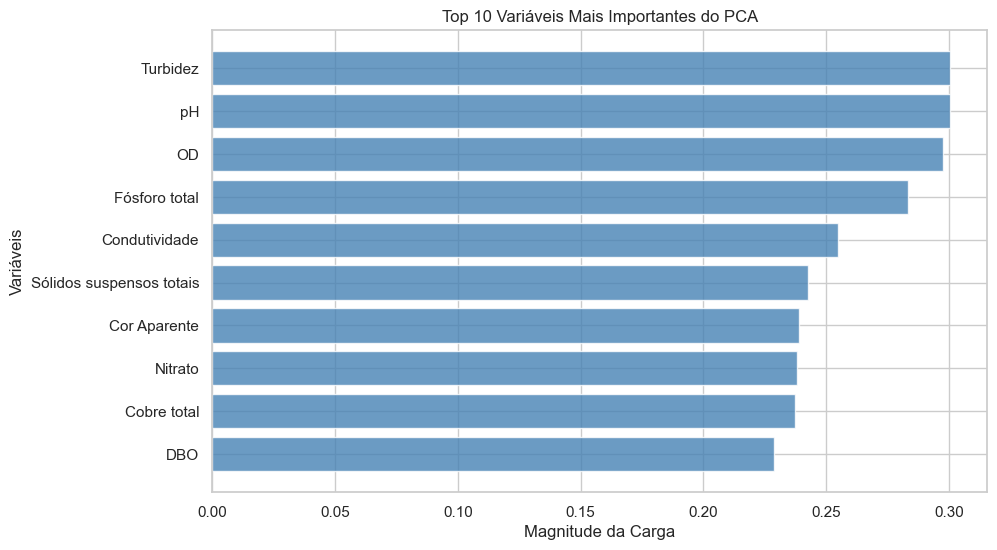

               Variável  Carga Total
2         Arsênio Total     0.885434
1             Antimônio     0.875408
32          Prata total     0.789407
33        Selênio total     0.781386
6          Cor Aparente     0.772593
26  Manganês dissolvido     0.751973
38       Cianobactérias     0.736603
28       Mercúrio total     0.696477
14              Nitrito     0.693847
8                   DBO     0.690850


In [95]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import os

# Diretório para salvar as imagens
output_dir = r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_MENINAS"
os.makedirs(output_dir, exist_ok=True)

# Selecionando as variáveis para PCA e Kernel PCA
variaveis_para_pca = ['Alcalinidade Total', 'Antimônio', 'Arsênio Total',
       'Bário Total', 'Cádmio Total', 'Condutividade', 'Cor Aparente',
       'Cromo Total', 'DBO', 'DQO', 'Fenóis Totais', 'Ferro Dissolvido',
       'Ferro Total', 'Nitrato', 'Nitrito', 'OD', 'pH', 'Turbidez',
       'Coliformes totais ', 'Microcistina ', 'Sulfeto', 'Cianeto livre',
       'Chumbo total', 'Cloreto', 'Cobre total', 'Fósforo total',
       'Manganês dissolvido', 'Manganês total', 'Mercúrio total',
       'Níquel total', 'Nitrogênio albuminóide', 'Nitrogênio amoniacal',
       'Prata total', 'Selênio total', 'Sólidos suspensos totais',
       'Sólidos dissolvidos totais', 'Zinco total', 'Escherichia coli',
       'Cianobactérias', 'Microcistinas', 'Saxitoxinas', 'Mercúrio total [hg]']
MENINAS_PCA = MENINAS[variaveis_para_pca]

# Normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(MENINAS[variaveis_para_pca])

# Realizando o PCA
pca = PCA()
pca_resultados = pca.fit_transform(dados_normalizados)
variancia_explicada = pca.explained_variance_ratio_

# Organizando os resultados em DataFrames para visualização
pca_df = pd.DataFrame(pca_resultados, columns=[f"PC{i+1}" for i in range(pca_resultados.shape[1])])
variancia_df = pd.DataFrame({"Componente": [f"PC{i+1}" for i in range(len(variancia_explicada))], "Variancia_Explicada": variancia_explicada})

# Visualizando a Variância Explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada * 100, alpha=0.7, color='b')
plt.ylabel('Percentual de Variância Explicada (%)')
plt.xlabel('Componente Principal')
plt.title('PCA - Variância Explicada por Componente')
plt.savefig(os.path.join(output_dir, 'variancia_explicada_por_componente.png'))
plt.show()

# Cargas dos componentes (ou seja, contribuições de cada variável)
cargas = pca.components_.T

# Plotando as cargas
num_componentes = 5  # Altere para o número desejado de componentes a serem visualizados
plt.figure(figsize=(10, 6))
for i in range(num_componentes):
    plt.bar(variaveis_para_pca, cargas[:, i], alpha=0.7, label=f'PC{i+1}')
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Carga')
plt.title('Contribuições das Variáveis por Componente Principal')
plt.legend()
plt.savefig(os.path.join(output_dir, 'contribuicoes_por_componente.png'))
plt.show()

# Criando um DataFrame com as cargas para o heatmap
cargas_df = pd.DataFrame(cargas, index=variaveis_para_pca, columns=[f"PC{i+1}" for i in range(len(variancia_explicada))])

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cargas_df.iloc[:, :num_componentes], annot=True, cmap="coolwarm", cbar_kws={'label': 'Carga'})
plt.title('Mapa de Calor das Cargas (Contribuições das Variáveis)')
plt.xlabel('Componentes Principais')
plt.ylabel('Variáveis')
plt.savefig(os.path.join(output_dir, 'heatmap_cargas.png'))
plt.show()



# Função genérica para o gráfico de mapa de fatores de variáveis
def plot_variable_factor_map(df, pca, title='Variable Factor Map'):
    # Cria a figura e o eixo para o gráfico
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plota as setas para cada variável no componente principal
    for i in range(pca.components_.shape[1]):
        if i < len(df.columns):
            ax.arrow(0, 0,
                     pca.components_[0, i] * 2.8,
                     pca.components_[1, i] * 2.8,
                     head_width=0.03,
                     head_length=0.03,
                     color='darkgreen', linestyle='-', alpha=0.8)  # Setas em verde escuro

    # Adiciona o círculo unitário para escala com borda e preenchimento verde-claro
    an = np.linspace(0, 2 * np.pi, 100)
    ax.fill(np.cos(an), np.sin(an), color='lightgreen', alpha=0.3)  # Preenchimento verde-claro semi-transparente
    ax.plot(np.cos(an), np.sin(an), color='green', linewidth=2)  # Borda do círculo em verde

    # Personaliza o título e os limites do eixo
    ax.set_title(title, fontsize=14, fontweight='bold', color='darkgreen')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    # Adiciona os rótulos das variáveis com ajuste automático de texto e estilo em preto e negrito
    texts = [ax.text(pca.components_[0, i] * 3 + 0.01,
                     pca.components_[1, i] * 3 + 0.01,
                     df.columns[i],
                     color='black', fontweight='bold', fontsize=10) for i in range(len(df.columns))]
    adjust_text(texts)

    # Salva e exibe o gráfico
    plt.savefig(os.path.join(output_dir, 'variable_factor_map.png'))
    plt.show()

# Chamada da função com o PCA treinado
plot_variable_factor_map(MENINAS[variaveis_para_pca], pca, 'Variable Factor Map')
# Número total de componentes principais
num_componentes = len(variancia_explicada)

visualizar_todos = False

if visualizar_todos == True:
    # Loop para plotar biplots para cada par de componentes principais
    for i in range(num_componentes - 1):
        for j in range(i + 1, num_componentes):
            plt.figure(figsize=(10, 8))
            plt.scatter(pca_df[f"PC{i+1}"], pca_df[f"PC{j+1}"], alpha=0.5, label='Observações')
            
            # Adicionando os vetores das variáveis no gráfico com linha tracejada vermelha
            for k, var in enumerate(variaveis_para_pca):
                plt.arrow(0, 0, cargas[k, i] * 5, cargas[k, j] * 5,
                        color='r', alpha=0.75, linestyle='--')  # Linha tracejada vermelha
                plt.text(cargas[k, i] * 5, cargas[k, j] * 5, var,
                        color='black', fontweight='bold', ha='center', va='center')  # Texto em preto e negrito

            plt.xlabel(f'PC{i+1}')
            plt.ylabel(f'PC{j+1}')
            plt.title(f'Biplot PCA - Componentes PC{i+1} e PC{j+1}')
            plt.grid()
            plt.legend()
            
            # Salvando cada figura individualmente
            plt.savefig(os.path.join(output_dir, f'biplot_PC{i+1}_PC{j+1}.png'))
            plt.show()

# Função para plotar as 10 variáveis mais importantes
def plot_top_10_variables(pca, variaveis, output_dir):
    # Calcula a importância das variáveis com base nos valores absolutos das cargas
    importancia = np.abs(pca.components_[0])  # Usando o primeiro componente principal como referência
    top_10_indices = np.argsort(importancia)[-10:][::-1]  # Seleciona os 10 maiores valores em ordem decrescente

    # Filtra as variáveis mais importantes e suas cargas
    top_10_variaveis = [variaveis[i] for i in top_10_indices]
    top_10_cargas = importancia[top_10_indices]

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_variaveis, top_10_cargas, color='steelblue', alpha=0.8)
    plt.xlabel('Magnitude da Carga')
    plt.ylabel('Variáveis')
    plt.title('Top 10 Variáveis Mais Importantes do PCA')
    plt.gca().invert_yaxis()  # Inverte o eixo Y para exibir o maior valor no topo

    # Salva e exibe o gráfico
    plt.savefig(os.path.join(output_dir, 'top_10_variaveis_pca.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Chamando a função para gerar o gráfico
plot_top_10_variables(pca, variaveis_para_pca, output_dir)


def top_10_pca_variables_and_filtered_data(data, components=1, refine=False):
    """
    Retorna as 10 variáveis mais influentes com base nas cargas do PCA e um DataFrame filtrado.

    Parâmetros:
    - data (pd.DataFrame): Conjunto de dados para a PCA (já filtrado e sem valores nulos).
    - components (int): Número de componentes principais a considerar. Default é 1 (PC1).
    - refine (bool): Se True, considera a soma dos valores absolutos das cargas em vários componentes.

    Retorno:
    - top_10_variaveis (pd.DataFrame): As 10 variáveis mais influentes e suas respectivas cargas totais.
    - filtered_data (pd.DataFrame): DataFrame contendo apenas as colunas das 10 variáveis mais importantes.
    """
    # Normalizando os dados
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    # Aplicando PCA
    pca = PCA()
    pca.fit(data_normalized)
    
    # Cargas (pesos das variáveis nos componentes principais)
    cargas = np.abs(pca.components_)

    if refine:
        # Soma dos valores absolutos das cargas nos primeiros 'components' componentes
        cargas_totais = np.sum(cargas[:components, :], axis=0)
    else:
        # Considera apenas o primeiro componente principal (PC1)
        cargas_totais = cargas[0, :]

    # Criar um DataFrame com as cargas totais e os nomes das variáveis
    variaveis = pd.DataFrame({
        'Variável': data.columns,
        'Carga Total': cargas_totais
    })

    # Ordenar e selecionar as 10 variáveis mais influentes
    top_10_variaveis = variaveis.sort_values(by='Carga Total', ascending=False).head(10)

    # Filtrar o DataFrame original para incluir apenas as 10 variáveis mais importantes
    top_10_nomes = top_10_variaveis['Variável'].tolist()
    filtered_data = data[top_10_nomes]

    return top_10_variaveis, filtered_data

# Exemplo de uso
# Suponha que `dados` seja o DataFrame com os dados de entrada
top_10, MENINAS_FINAL = top_10_pca_variables_and_filtered_data(MENINAS_PCA, components=5, refine=True)
print(top_10)



20 [0.18330909 0.65940503]
21 [-0.9006816 -0.2155606]
41 [-0.72243007 -0.83758649]


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\768797036.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



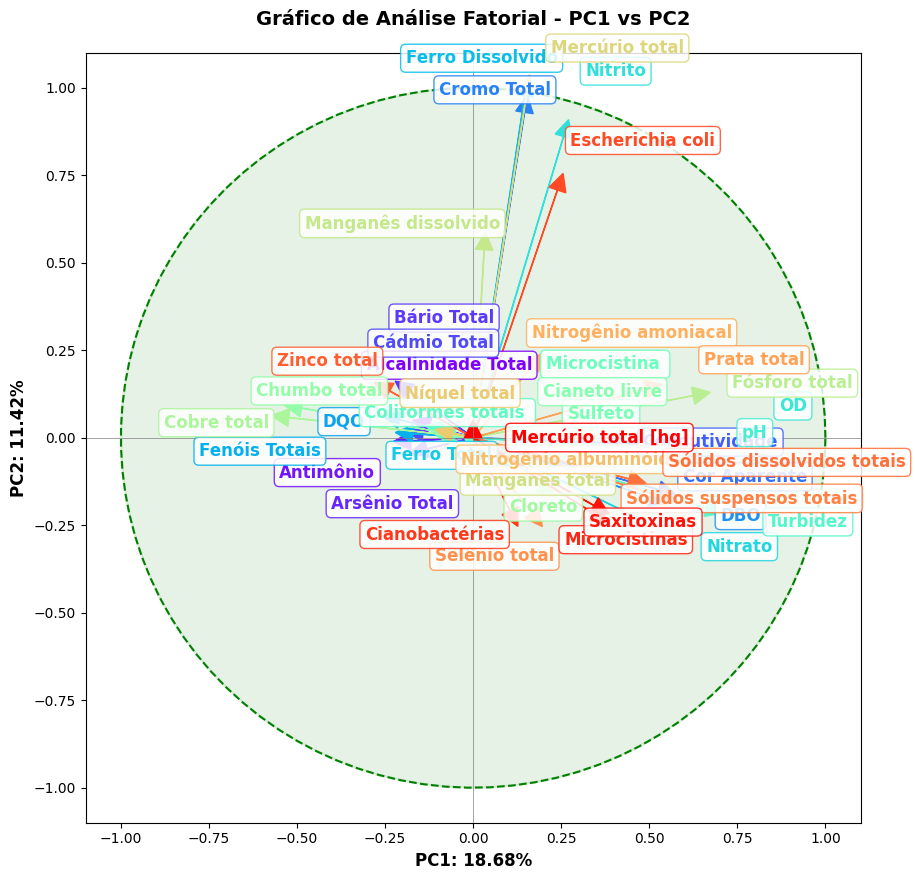

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\768797036.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



20 [0.90014479 0.61281515]
21 [0.5861092  0.89098958]
41 [-0.29202973  0.70426137]


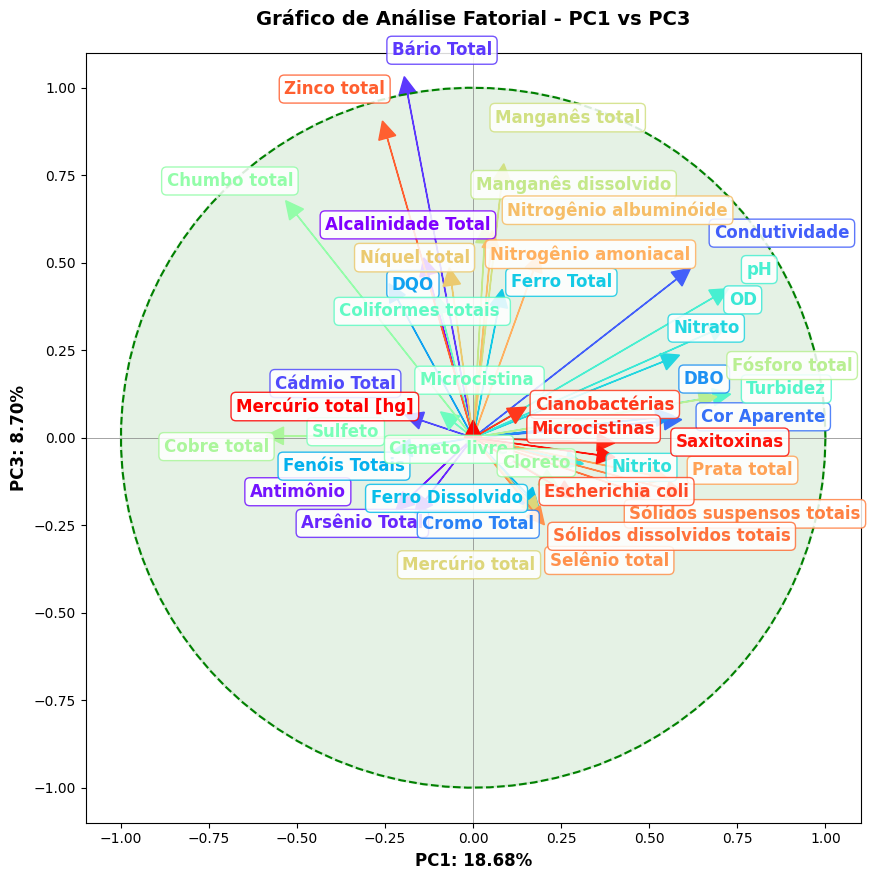

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\768797036.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



20 [-0.09228276  0.09819711]
21 [0.40579982 0.45506943]


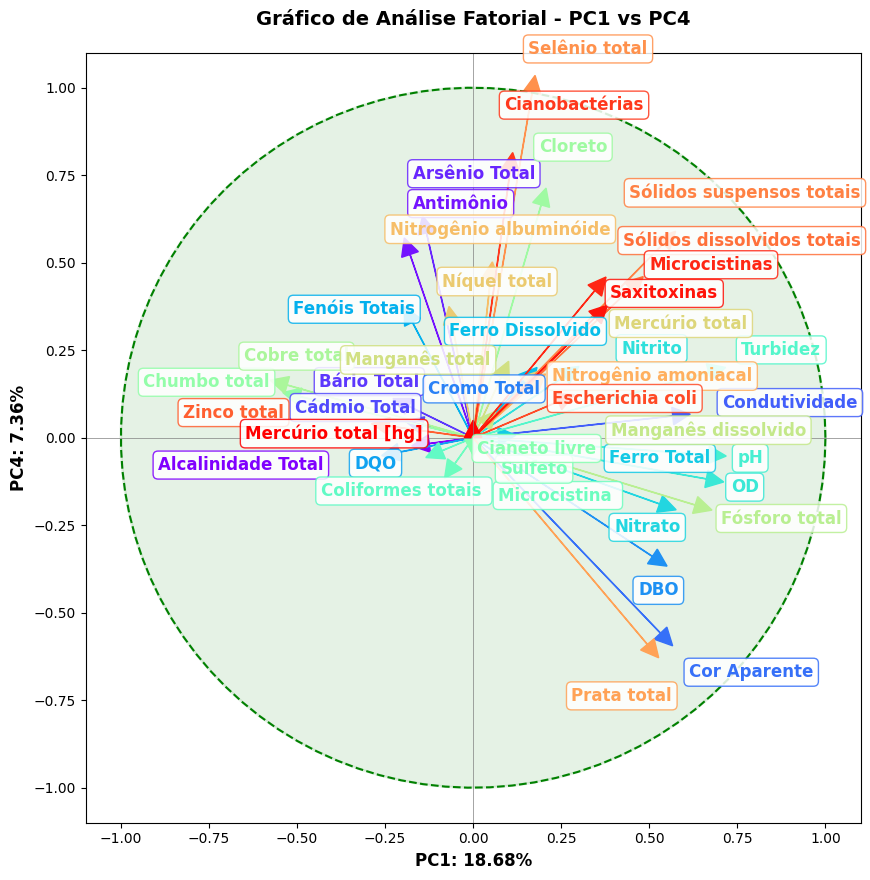

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\768797036.py:6: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



20 [0.59717105 0.85179516]
21 [ 0.02715936 -0.96506818]
41 [-0.78278516 -0.73502797]


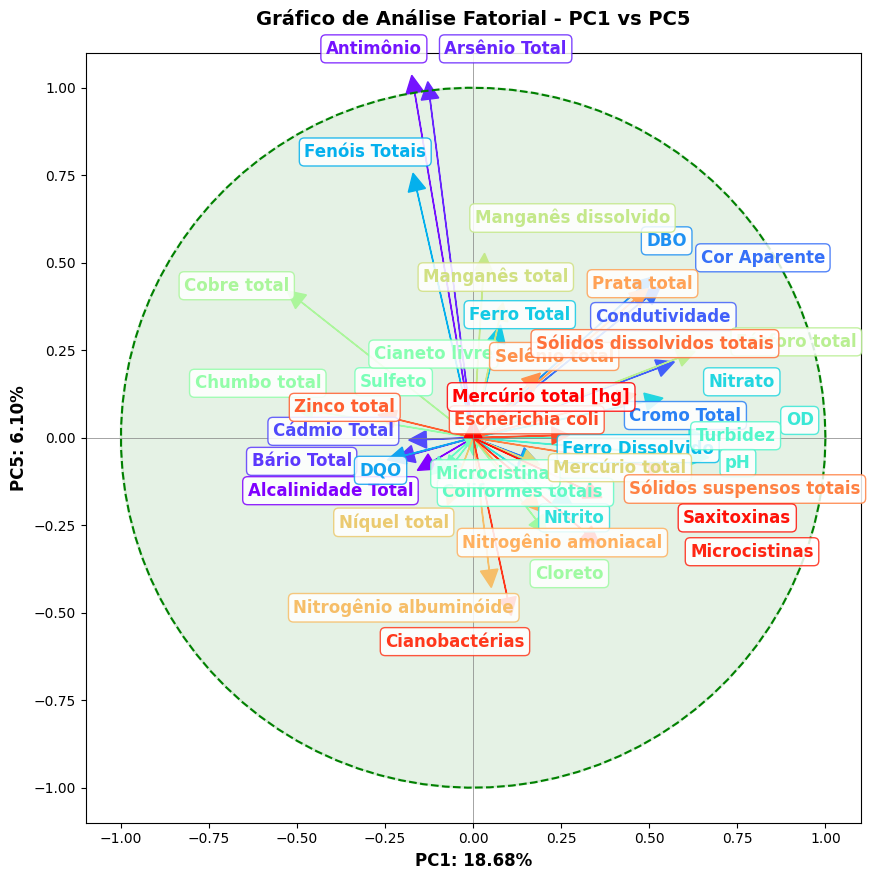

In [36]:
# Função genérica para o gráfico de mapa de fatores de variáveis para um par de componentes principais
def plot_variable_factor_map(df, pca, pc_x=0, pc_y=1, title='Gráfico de Análise Fatorial', text_size=12):
    # Cria a figura e o eixo para o gráfico
    fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
    # Plotando o círculo com borda verde e preenchimento verde claro transparente
    circle = plt.Circle((0, 0), 1, color='green', fill=True, alpha=0.1, linewidth=2, edgecolor='green')
    ax.add_patch(circle)
    
    # Calcula o comprimento máximo entre as setas (vetores) para normalização
    max_magnitude = max(np.sqrt(pca.components_[pc_x, i]**2 + pca.components_[pc_y, i]**2) for i in range(pca.components_.shape[1]))
    scale_factor = 1 / max_magnitude  # Define o fator de escala

    # Gera uma lista de cores única para cada variável
    colors = cm.rainbow(np.linspace(0, 1, len(df.columns)))

    # Ajusta o comprimento das setas e adiciona as cores únicas
    for i in range(pca.components_.shape[1]):
        if i < len(df.columns):
            vector_x = pca.components_[pc_x, i] * scale_factor
            vector_y = pca.components_[pc_y, i] * scale_factor
            ax.arrow(0, 0, vector_x, vector_y, head_width=0.05, head_length=0.05, color=colors[i], alpha=1, linewidth=1)  # Usa uma cor única para cada variável
    
    # Adiciona um círculo tracejado para destacar a unidade de escala
    an = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(an), np.sin(an), linestyle='--', color='green', linewidth=1.5)
    
    # Adiciona os rótulos das variáveis com cores correspondentes às setas
    texts = [ax.text((pca.components_[pc_x, i] * scale_factor) * 1.1, (pca.components_[pc_y, i] * scale_factor) * 1.2, df.columns[i], color=colors[i], fontweight='bold', ha='center', va='center', fontsize=text_size, bbox=dict(boxstyle="round,pad=0.3", edgecolor=colors[i], facecolor='white', alpha=0.85)) for i in range(len(df.columns))]
    adjust_text(texts)
    
    # Exibe a porcentagem de variância explicada nos eixos
    explained_variance = pca.explained_variance_ratio_ * 100
    ax.set_xlabel(f'PC{pc_x + 1}: {explained_variance[pc_x]:.2f}%', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC{pc_y + 1}: {explained_variance[pc_y]:.2f}%', fontsize=12, fontweight='bold')

    # Configurações gerais do gráfico
    ax.axhline(0, color='grey', linewidth=0.5)
    ax.axvline(0, color='grey', linewidth=0.5)
    ax.set_xlim([-1.1, 1.1])  # Limita o eixo X a [-1.1, 1.1]
    ax.set_ylim([-1.1, 1.1])  # Limita o eixo Y a [-1.1, 1.1]
    ax.set_title(f'{title} - PC{pc_x+1} vs PC{pc_y+1}', fontsize=14, fontweight='bold', color='black', pad=20)
    # Salva e exibe o gráfico
    plt.savefig(f'variable_factor_map_PC{pc_x+1}_PC{pc_y+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Gerar gráficos para os 5 primeiros componentes principais
for pc_x in range(1):
    for pc_y in range(pc_x + 1, 5):
        plot_variable_factor_map(MENINAS[variaveis_para_pca], pca, pc_x=pc_x, pc_y=pc_y, title='Gráfico de Análise Fatorial', text_size=12)

# permutação


Desempenho do Modelo Random Forest:
Acurácia: 0.6

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.62      0.90      0.73        20
           3       0.29      0.22      0.25         9
           4       1.00      0.38      0.55         8
           5       1.00      0.50      0.67         2

    accuracy                           0.60        40
   macro avg       0.58      0.40      0.44        40
weighted avg       0.62      0.60      0.57        40


Matriz de Confusão:
 [[ 0  1  0  0  0]
 [ 0 18  2  0  0]
 [ 0  7  2  0  0]
 [ 0  3  2  3  0]
 [ 0  0  1  0  1]]


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\1450701331.py:41: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



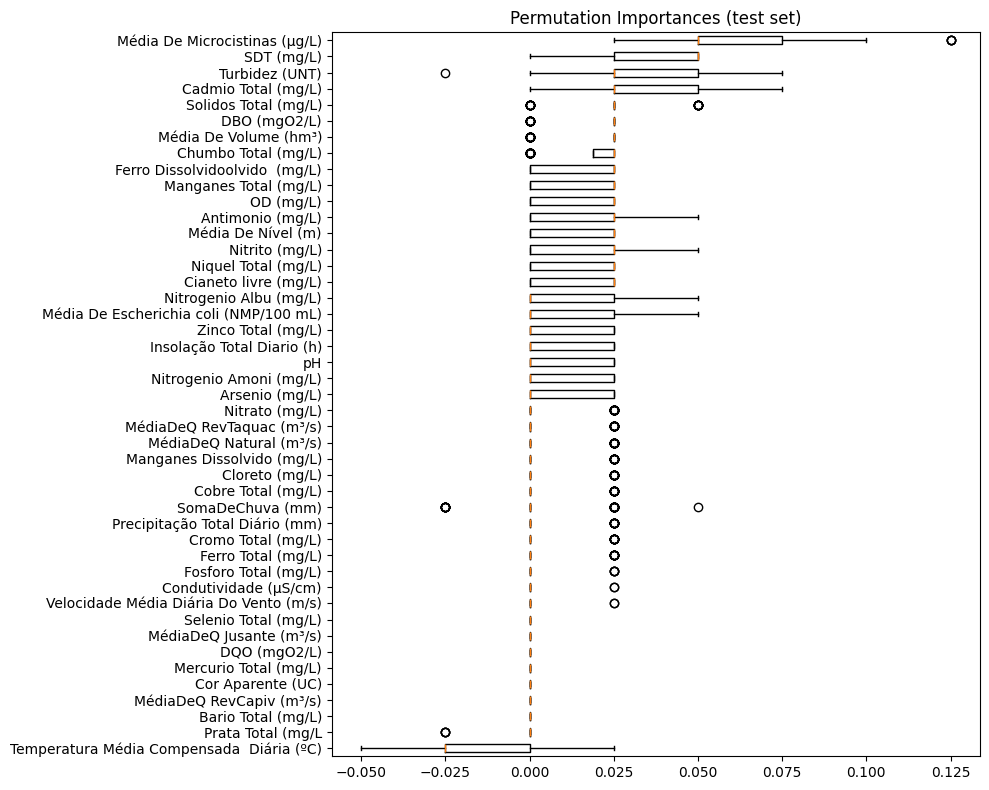

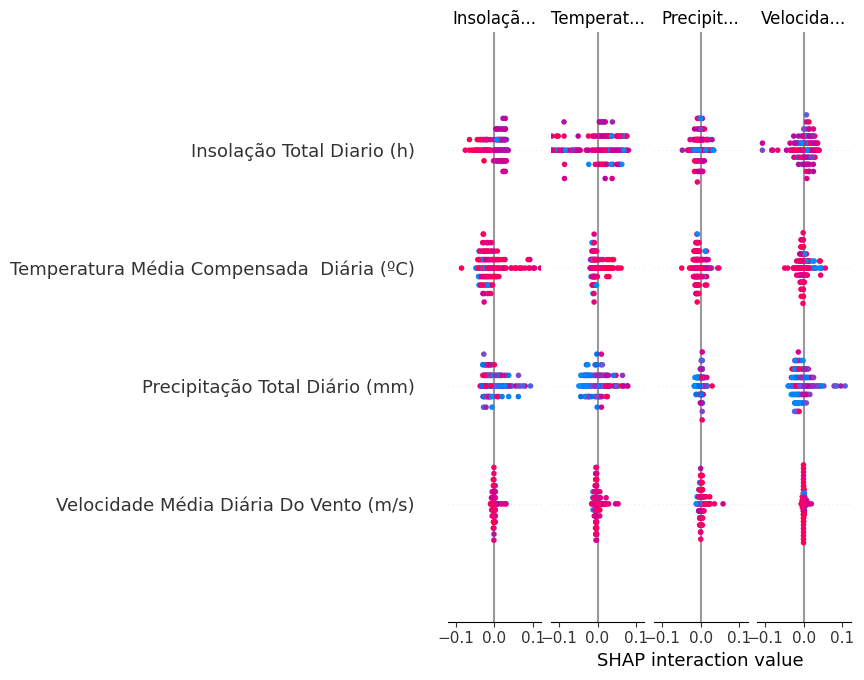


Desempenho do Modelo Rede Neural:
Acurácia: 0.525

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.64      0.70      0.67        20
           3       0.36      0.44      0.40         9
           4       0.50      0.38      0.43         8
           5       0.00      0.00      0.00         2

    accuracy                           0.53        40
   macro avg       0.30      0.30      0.30        40
weighted avg       0.50      0.53      0.51        40


Matriz de Confusão:
 [[ 0  1  0  0  0]
 [ 0 14  3  2  1]
 [ 0  5  4  0  0]
 [ 0  2  3  3  0]
 [ 0  0  1  1  0]]


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [37]:
# Separar os dados em X e y
X = ANTONIO[['Insolação Total Diario (h)', 'Precipitação Total Diário (mm)',
       'Temperatura Média Compensada  Diária (ºC)',
       'Velocidade Média Diária Do Vento (m/s)', 'MédiaDeQ RevTaquac (m³/s)',
       'MédiaDeQ RevCapiv (m³/s)', 'Média De Nível (m)',
       'Média De Volume (hm³)', 'MédiaDeQ Jusante (m³/s)', 'SomaDeChuva (mm)',
       'MédiaDeQ Natural (m³/s)', 'Antimonio (mg/L)', 'Arsenio (mg/L)',
       'Bario Total (mg/L)', 'Cadmio Total (mg/L)', 'Chumbo Total (mg/L)',
       'Cianeto livre (mg/L)', 'Cloreto (mg/L)', 'Cobre Total (mg/L)',
       'Condutividade (µS/cm)', 'Cor Aparente (UC)', 'Cromo Total (mg/L)',
       'DBO (mgO2/L)', 'DQO (mgO2/L)', 'Ferro Dissolvidoolvido  (mg/L)',
       'Ferro Total (mg/L)', 'Fosforo Total (mg/L)',
       'Manganes Dissolvido (mg/L)', 'Manganes Total (mg/L)',
       'Mercurio Total (mg/L)', 'Niquel Total (mg/L)',
       'Nitrogenio Albu (mg/L)', 'Nitrogenio Amoni (mg/L)', 'Nitrato (mg/L)',
       'Nitrito (mg/L)', 'OD (mg/L)', 'pH', 'Prata Total (mg/L',
       'Selenio Total (mg/L)', 'SDT (mg/L)', 'Solidos Total (mg/L)',
       'Turbidez (UNT)', 'Zinco Total (mg/L)',
       'Média De Escherichia coli (NMP/100 mL)',
       'Média De Microcistinas (µg/L)']]
y = ANTONIO[['Classe']].values.ravel()  # Converter y para array unidimensional

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. **Modelo de Classificação: Random Forest**
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print("\nDesempenho do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

# Importâncias de Permutação
result = permutation_importance(rf_model, X_test, y_test, n_repeats=100, n_jobs=4)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 8))  # Ajuste no tamanho da figura
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.savefig(r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_ANTONIO\teste_de_permutacao.png", dpi=300)
plt.show()

# SHAP para Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

# 2. **Modelo de Classificação: Rede Neural**
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_nn = nn_model.predict(X_test)
print("\nDesempenho do Modelo Rede Neural:")
print("Acurácia:", accuracy_score(y_test, y_pred_nn))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nn, zero_division=0))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_nn))



Desempenho do Modelo Random Forest:
Acurácia: 0.5882352941176471

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.70      0.67      0.68        24
           3       0.12      0.20      0.15         5
           4       0.17      0.33      0.22         3
           5       0.00      0.00      0.00         2

    accuracy                           0.59        51
   macro avg       0.37      0.38      0.37        51
weighted avg       0.64      0.59      0.61        51


Matriz de Confusão:
 [[12  3  0  2  0]
 [ 2 16  5  1  0]
 [ 0  3  1  1  0]
 [ 0  1  1  1  0]
 [ 0  0  1  1  0]]


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_45596\2772355345.py:33: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



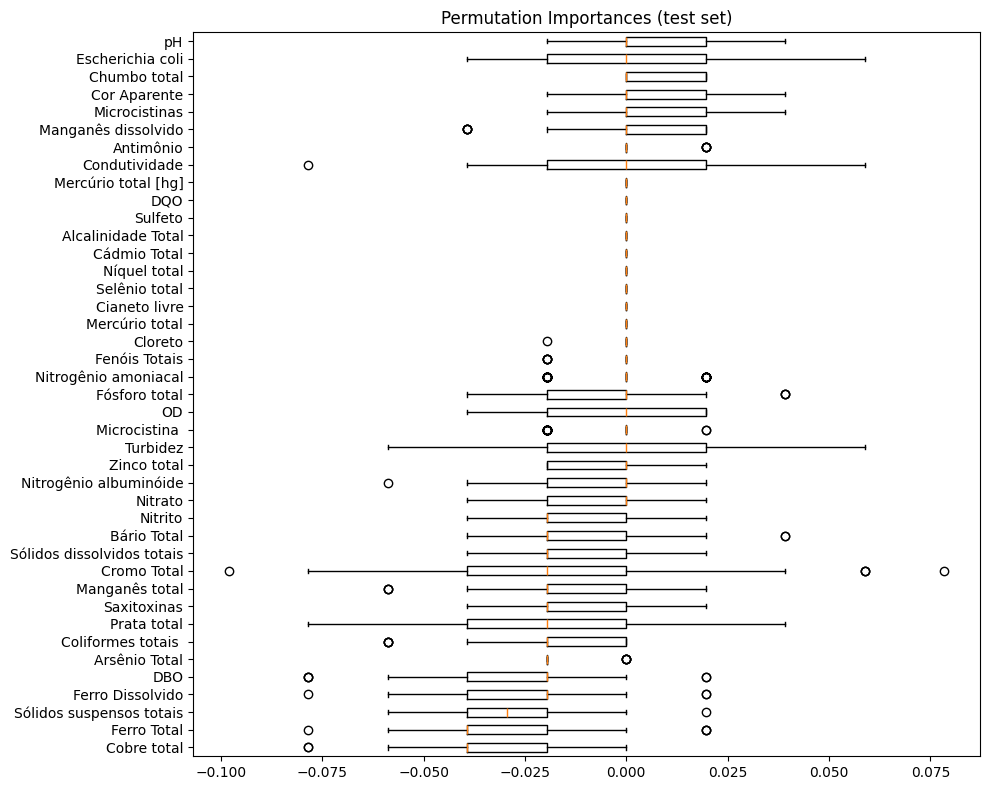

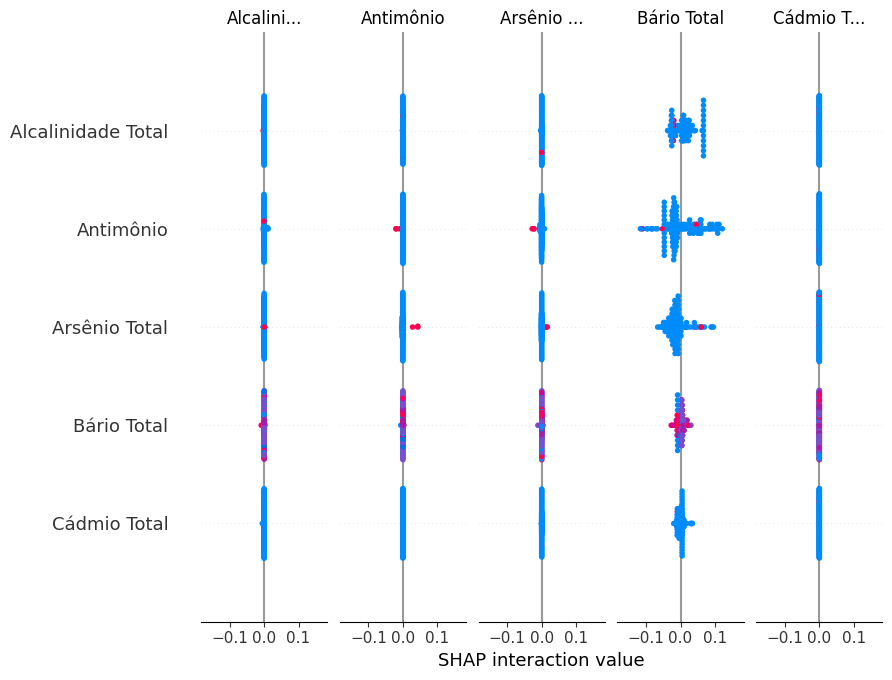


Desempenho do Modelo Rede Neural:
Acurácia: 0.37254901960784315

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.67      0.59      0.62        17
           2       0.42      0.33      0.37        24
           3       0.00      0.00      0.00         5
           4       0.12      0.33      0.18         3
           5       0.00      0.00      0.00         2

    accuracy                           0.37        51
   macro avg       0.24      0.25      0.24        51
weighted avg       0.43      0.37      0.39        51


Matriz de Confusão:
 [[10  6  1  0  0]
 [ 3  8  7  6  0]
 [ 1  3  0  1  0]
 [ 0  1  1  1  0]
 [ 1  1  0  0  0]]


In [38]:
# Separar os dados em X e y
X = MENINAS[['Alcalinidade Total', 'Antimônio', 'Arsênio Total',
       'Bário Total', 'Cádmio Total', 'Condutividade', 'Cor Aparente',
       'Cromo Total', 'DBO', 'DQO', 'Fenóis Totais', 'Ferro Dissolvido',
       'Ferro Total', 'Nitrato', 'Nitrito', 'OD', 'pH', 'Turbidez',
       'Coliformes totais ', 'Microcistina ', 'Sulfeto', 'Cianeto livre',
       'Chumbo total', 'Cloreto', 'Cobre total', 'Fósforo total',
       'Manganês dissolvido', 'Manganês total', 'Mercúrio total',
       'Níquel total', 'Nitrogênio albuminóide', 'Nitrogênio amoniacal',
       'Prata total', 'Selênio total', 'Sólidos suspensos totais',
       'Sólidos dissolvidos totais', 'Zinco total', 'Escherichia coli',
       'Microcistinas', 'Saxitoxinas', 'Mercúrio total [hg]']]
y = MENINAS[['Classe']].values.ravel()  # Converter y para array unidimensional

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. **Modelo de Classificação: Random Forest**
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print("\nDesempenho do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

# Importâncias de Permutação
result = permutation_importance(rf_model, X_test, y_test, n_repeats=100, n_jobs=4)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 8))  # Ajuste no tamanho da figura
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.savefig(r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_MENINAS\teste_de_permutacao.png", dpi=300)
plt.show()

# SHAP para Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

# 2. **Modelo de Classificação: Rede Neural**
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_nn = nn_model.predict(X_test)
print("\nDesempenho do Modelo Rede Neural:")
print("Acurácia:", accuracy_score(y_test, y_pred_nn))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nn, zero_division=0))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_nn))


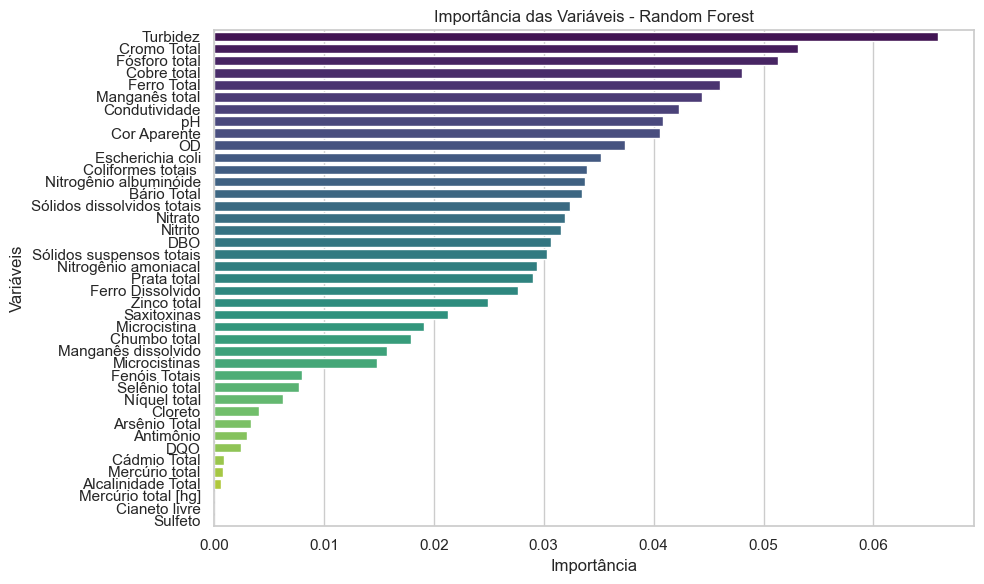

NameError: name 'ExtraTreesClassifier' is not defined

In [39]:

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Diretório para salvar as figuras
diretorio_figuras = r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_MENINAS\ANALISE"
os.makedirs(diretorio_figuras, exist_ok=True)

# Definindo as variáveis e o DataFrame
variaveis_modelo = ['Alcalinidade Total', 'Antimônio', 'Arsênio Total',
       'Bário Total', 'Cádmio Total', 'Condutividade', 'Cor Aparente',
       'Cromo Total', 'DBO', 'DQO', 'Fenóis Totais', 'Ferro Dissolvido',
       'Ferro Total', 'Nitrato', 'Nitrito', 'OD', 'pH', 'Turbidez',
       'Coliformes totais ', 'Microcistina ', 'Sulfeto', 'Cianeto livre',
       'Chumbo total', 'Cloreto', 'Cobre total', 'Fósforo total',
       'Manganês dissolvido', 'Manganês total', 'Mercúrio total',
       'Níquel total', 'Nitrogênio albuminóide', 'Nitrogênio amoniacal',
       'Prata total', 'Selênio total', 'Sólidos suspensos totais',
       'Sólidos dissolvidos totais', 'Zinco total', 'Escherichia coli',
       'Microcistinas', 'Saxitoxinas', 'Mercúrio total [hg]']

# Supondo que 'MENINAS' é o seu DataFrame
X = MENINAS[variaveis_modelo]
y = MENINAS['Classe']

# Converte a variável target para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divisão de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para visualização das importâncias
def plot_importance(importances, feature_names, title, save_path):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
    plt.title(title)
    plt.xlabel("Importância")
    plt.ylabel("Variáveis")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# 1. Random Forest Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importancias_rf = rf.feature_importances_
plot_importance(importancias_rf, variaveis_modelo, "Importância das Variáveis - Random Forest",
                os.path.join(diretorio_figuras, "random_forest_importancia.png"))

# 2. Extra Trees Importance
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)
importancias_et = extra_trees.feature_importances_
plot_importance(importancias_et, variaveis_modelo, "Importância das Variáveis - Extra Trees",
                os.path.join(diretorio_figuras, "extra_trees_importancia.png"))

# 3. Permutation Importance
perm_importances = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances_mean = perm_importances.importances_mean
plot_importance(perm_importances_mean, variaveis_modelo, "Importância das Variáveis - Permutation Importance",
                os.path.join(diretorio_figuras, "permutation_importancia.png"))

# 4. SHAP Importance
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Para classificação binária ou multi-classe, usar a explicação apropriada
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, plot_type="bar", feature_names=variaveis_modelo)  # Para classificação binária
else:
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=variaveis_modelo)

plt.title("Importância das Variáveis - SHAP")
plt.savefig(os.path.join(diretorio_figuras, "shap_importancia.png"))
plt.show()

# Resumo final das importâncias em DataFrame para comparação
df_importancias = pd.DataFrame({
    "Variáveis": variaveis_modelo,
    "Random Forest": importancias_rf,
    "Extra Trees": importancias_et,
    "Permutation": perm_importances_mean
}).set_index("Variáveis")

# Exportando para Excel para fácil comparação
df_importancias.to_excel(os.path.join(diretorio_figuras, "importancias_comparacao.xlsx"))
print("Exportação concluída para o arquivo 'importancias_comparacao.xlsx'.")

# Exibindo o DataFrame final de importâncias
df_importancias.plot(kind="bar", figsize=(12, 8), colormap="Set3")
plt.title("Comparação da Importância das Variáveis")
plt.ylabel("Importância")
plt.tight_layout()
plt.savefig(os.path.join(diretorio_figuras, "comparacao_importancias.png"))
plt.show()



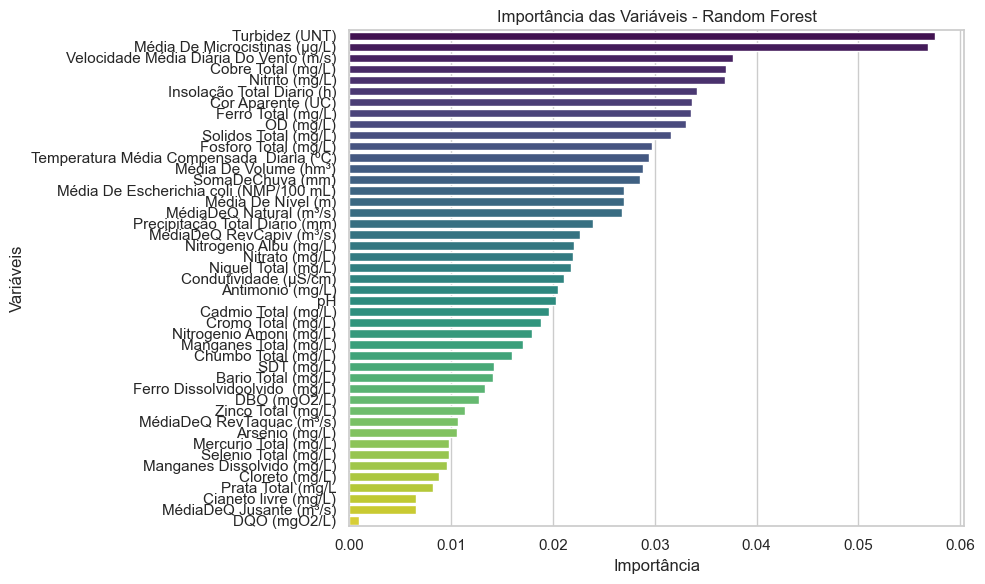

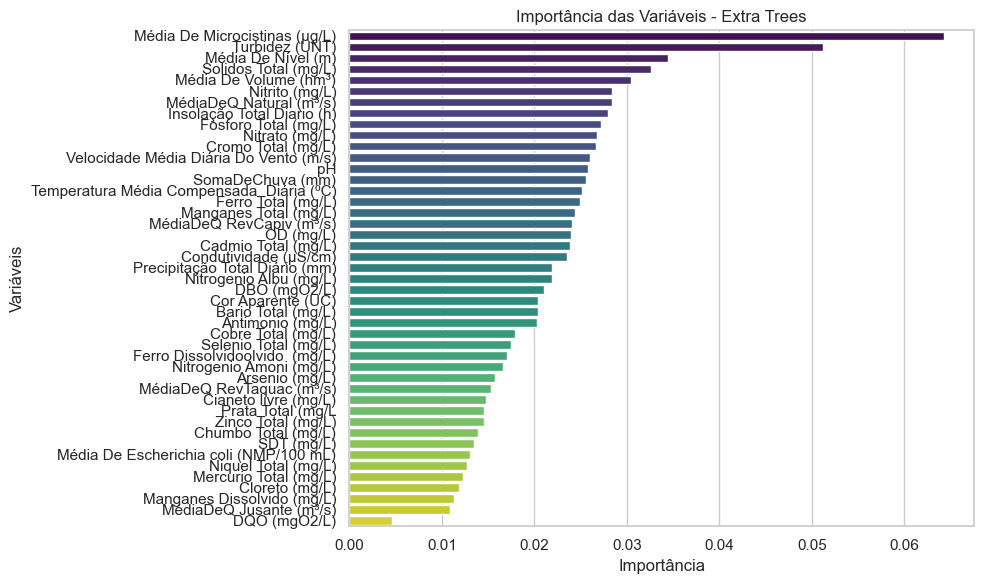

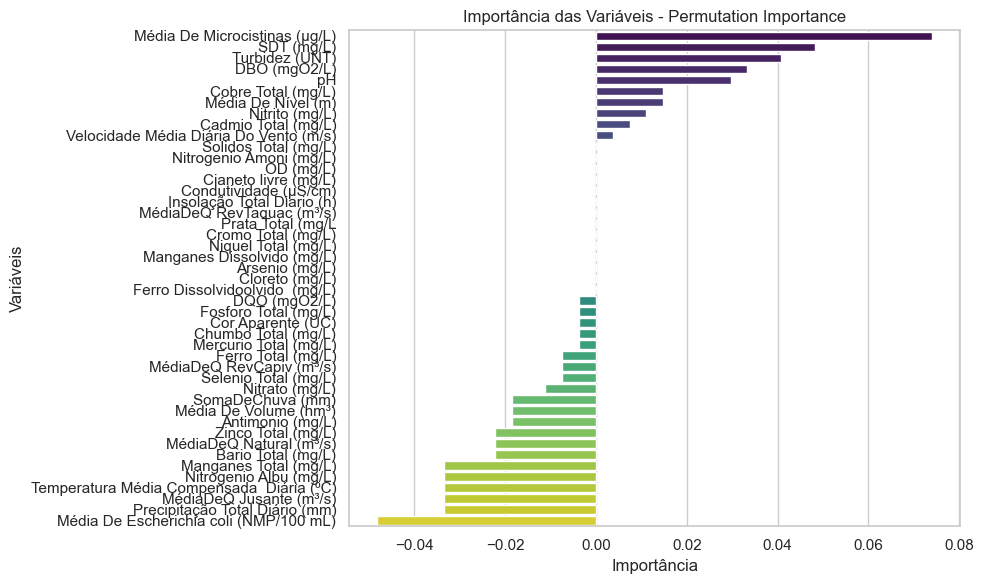

TypeError: only integer scalar arrays can be converted to a scalar index

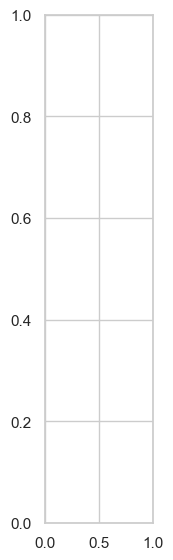

In [93]:

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)

# Diretório para salvar as figuras
diretorio_figuras = r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\RESULTADOS\PCA_ANTONIO\ANALISE"
os.makedirs(diretorio_figuras, exist_ok=True)

# Definindo as variáveis e o DataFrame
variaveis_modelo = ['Insolação Total Diario (h)', 'Precipitação Total Diário (mm)',
       'Temperatura Média Compensada  Diária (ºC)',
       'Velocidade Média Diária Do Vento (m/s)', 'MédiaDeQ RevTaquac (m³/s)',
       'MédiaDeQ RevCapiv (m³/s)', 'Média De Nível (m)',
       'Média De Volume (hm³)', 'MédiaDeQ Jusante (m³/s)', 'SomaDeChuva (mm)',
       'MédiaDeQ Natural (m³/s)', 'Antimonio (mg/L)', 'Arsenio (mg/L)',
       'Bario Total (mg/L)', 'Cadmio Total (mg/L)', 'Chumbo Total (mg/L)',
       'Cianeto livre (mg/L)', 'Cloreto (mg/L)', 'Cobre Total (mg/L)',
       'Condutividade (µS/cm)', 'Cor Aparente (UC)', 'Cromo Total (mg/L)',
       'DBO (mgO2/L)', 'DQO (mgO2/L)', 'Ferro Dissolvidoolvido  (mg/L)',
       'Ferro Total (mg/L)', 'Fosforo Total (mg/L)',
       'Manganes Dissolvido (mg/L)', 'Manganes Total (mg/L)',
       'Mercurio Total (mg/L)', 'Niquel Total (mg/L)',
       'Nitrogenio Albu (mg/L)', 'Nitrogenio Amoni (mg/L)', 'Nitrato (mg/L)',
       'Nitrito (mg/L)', 'OD (mg/L)', 'pH', 'Prata Total (mg/L',
       'Selenio Total (mg/L)', 'SDT (mg/L)', 'Solidos Total (mg/L)',
       'Turbidez (UNT)', 'Zinco Total (mg/L)',
       'Média De Escherichia coli (NMP/100 mL)',
       'Média De Microcistinas (µg/L)']

# Supondo que 'MENINAS' é o seu DataFrame
X = ANTONIO[variaveis_modelo]
y = ANTONIO['Classe']

# Converte a variável target para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divisão de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para visualização das importâncias
def plot_importance(importances, feature_names, title, save_path):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
    plt.title(title)
    plt.xlabel("Importância")
    plt.ylabel("Variáveis")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# 1. Random Forest Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importancias_rf = rf.feature_importances_
plot_importance(importancias_rf, variaveis_modelo, "Importância das Variáveis - Random Forest",
                os.path.join(diretorio_figuras, "random_forest_importancia.png"))

# 2. Extra Trees Importance
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)
importancias_et = extra_trees.feature_importances_
plot_importance(importancias_et, variaveis_modelo, "Importância das Variáveis - Extra Trees",
                os.path.join(diretorio_figuras, "extra_trees_importancia.png"))

# 3. Permutation Importance
perm_importances = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances_mean = perm_importances.importances_mean
plot_importance(perm_importances_mean, variaveis_modelo, "Importância das Variáveis - Permutation Importance",
                os.path.join(diretorio_figuras, "permutation_importancia.png"))

# 4. SHAP Importance
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Para classificação binária ou multi-classe, usar a explicação apropriada
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, plot_type="bar", feature_names=variaveis_modelo)  # Para classificação binária
else:
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=variaveis_modelo)

plt.title("Importância das Variáveis - SHAP")
plt.savefig(os.path.join(diretorio_figuras, "shap_importancia.png"))
plt.show()

# Resumo final das importâncias em DataFrame para comparação
df_importancias = pd.DataFrame({
    "Variáveis": variaveis_modelo,
    "Random Forest": importancias_rf,
    "Extra Trees": importancias_et,
    "Permutation": perm_importances_mean
}).set_index("Variáveis")

# Exportando para Excel para fácil comparação
df_importancias.to_excel(os.path.join(diretorio_figuras, "importancias_comparacao.xlsx"))
print("Exportação concluída para o arquivo 'importancias_comparacao.xlsx'.")

# Exibindo o DataFrame final de importâncias
df_importancias.plot(kind="bar", figsize=(12, 8), colormap="Set3")
plt.title("Comparação da Importância das Variáveis")
plt.ylabel("Importância")
plt.tight_layout()
plt.savefig(os.path.join(diretorio_figuras, "comparacao_importancias.png"))
plt.show()

